In [1]:
import operator
import math


def create_data_set():
    '''Generate a simple test data set.'''

    data_set = [
        [1, 1, 'yes'],
        [1, 1, 'yes'],
        [1, 0, 'no'],
        [0, 1, 'no'],
        [0, 1, 'no'],
    ]
    labels = ['no surfacing', 'flippers']
    return data_set, labels


def shannon_entropy(data_set):
    '''Calculate Shannon entropy.'''

    num_entries = len(data_set)
    label_dict = {}

    for feature_vec in data_set:
        curr_label = feature_vec[-1]
        if curr_label not in label_dict:
            label_dict[curr_label] = 0
        label_dict[curr_label] += 1

    entropy = 0.0
    for key in label_dict:
        prob = float(label_dict[key]) / num_entries
        entropy -= prob * math.log(prob, 2)

    return entropy


def split_data_set(data_set, axis, value):
    '''Split set according to specified feature and value.'''

    result = []
    for feat_vec in data_set:
        if feat_vec[axis] == value:
            result.append(feat_vec[:axis] + feat_vec[axis+1:])

    return result


def best_feat_to_split(data_set):
    num_features = len(data_set[0]) - 1
    base_entropy = shannon_entropy(data_set)
    best_info_gain = 0.0
    best_feature = -1

    for i in range(num_features):
        feat_vals = [example[i] for example in data_set]
        uniq_feat_vals = set(feat_vals)
        new_entropy = 0.0

        for val in uniq_feat_vals:
            sub_data_set = split_data_set(data_set, i, val)            
            prob = len(sub_data_set) / float(len(data_set))
            print("prob for data set {} is {}".format(sub_data_set, prob))
            new_entropy += prob * shannon_entropy(sub_data_set)
            
        info_gain = base_entropy - new_entropy
        print("feature {}, new_entropy {}".format(i, new_entropy))
        if info_gain > best_info_gain:
            best_info_gain = info_gain
            best_feature = i

    return best_feature

def majority_count(class_list):
    class_count = {}
    for vote in class_list:
        if vote not in class_count:
            class_count[vote] = 0
        class_count[vote] += 1
    sorted_class_count = sorted(class_count.items(),
                                key=operator.itemgetter(1), 
                                reverse=True)
    return sorted_class_count[0][0]

def create_tree(data_set, labels):
    class_list = [example[-1] for example in data_set]
    if class_list.count(class_list[0]) == len(class_list):
        return class_list[0]
    if len(data_set[0]) == 1:
        return majority_count(class_list)
    
    best_feature = best_feat_to_split(data_set)
    print("debug: data: {}, best_feature: {}".format(data_set, best_feature))
    best_feature_label = labels[best_feature]
    
    tree = {best_feature_label: {}}
    del(labels[best_feature])
    feat_values = [example[best_feature] for example in data_set]
    uniq_values = set(feat_values)
    
    for val in uniq_values:
        sub_labels = labels[:]
        tree[best_feature_label][val] = create_tree(split_data_set(data_set, 
                                                                   best_feature, 
                                                                   val),
                                                    sub_labels)
    return tree

def classify(inputTree, featLabels, testVec):
    firstStr = list(inputTree)[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    key = testVec[featIndex]
    valueOfFeat = secondDict[key]
    if isinstance(valueOfFeat, dict):
        classLabel = classify(valueOfFeat, featLabels, testVec)
    else: classLabel = valueOfFeat
    return classLabel

def storeTree(inputTree, filename):
    import pickle
    fw = open(filename, 'wb')
    pickle.dump(inputTree, fw)
    fw.close()

def grabTree(filename):
    import pickle
    fr = open(filename, 'rb')
    return pickle.load(fr)

In [84]:
dat, labels = create_data_set()
print(dat, labels)

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']] ['no surfacing', 'flippers']


In [81]:
shannon_entropy(dat)

0.9709505944546686

In [85]:
tree = create_tree(dat, labels)

prob for data set [[1, 'no'], [1, 'no']] is 0.4
prob for data set [[1, 'yes'], [1, 'yes'], [0, 'no']] is 0.6
feature 0, new_entropy 0.5509775004326937
prob for data set [[1, 'no']] is 0.2
prob for data set [[1, 'yes'], [1, 'yes'], [0, 'no'], [0, 'no']] is 0.8
feature 1, new_entropy 0.8
debug: data: [[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']], best_feature: 0
prob for data set [['no']] is 0.3333333333333333
prob for data set [['yes'], ['yes']] is 0.6666666666666666
feature 0, new_entropy 0.0
debug: data: [[1, 'yes'], [1, 'yes'], [0, 'no']], best_feature: 0


In [12]:
import plot
import decision_tree

dat, labels = decision_tree.create_data_set()
tree = plot.retrieveTree(0)
decision_tree.classify(tree, labels, [1, 1])

'yes'

In [5]:
decision_tree.store_tree(tree, 'tree.txt')

In [6]:
decision_tree.grab_tree('tree.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [13]:
file = open('lenses.txt')
lenses = [line.strip().split('\t') for line in file.readlines()]

labels = ['age', 'prescript', 'astigmatic', 'tearRate']
lenses_tree = decision_tree.create_tree(lenses, labels)

prob for data set [['myope', 'no', 'reduced', 'no lenses'], ['myope', 'no', 'normal', 'soft'], ['myope', 'yes', 'reduced', 'no lenses'], ['myope', 'yes', 'normal', 'hard'], ['hyper', 'no', 'reduced', 'no lenses'], ['hyper', 'no', 'normal', 'soft'], ['hyper', 'yes', 'reduced', 'no lenses'], ['hyper', 'yes', 'normal', 'hard']] is 0.3333333333333333
prob for data set [['myope', 'no', 'reduced', 'no lenses'], ['myope', 'no', 'normal', 'soft'], ['myope', 'yes', 'reduced', 'no lenses'], ['myope', 'yes', 'normal', 'hard'], ['hyper', 'no', 'reduced', 'no lenses'], ['hyper', 'no', 'normal', 'soft'], ['hyper', 'yes', 'reduced', 'no lenses'], ['hyper', 'yes', 'normal', 'no lenses']] is 0.3333333333333333
prob for data set [['myope', 'no', 'reduced', 'no lenses'], ['myope', 'no', 'normal', 'no lenses'], ['myope', 'yes', 'reduced', 'no lenses'], ['myope', 'yes', 'normal', 'hard'], ['hyper', 'no', 'reduced', 'no lenses'], ['hyper', 'no', 'normal', 'soft'], ['hyper', 'yes', 'reduced', 'no lenses'], [

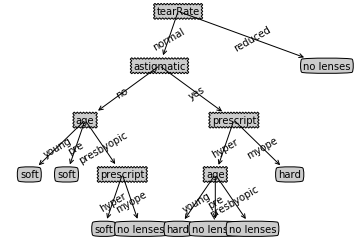

In [14]:
plot.createPlot(lenses_tree)